# Лабораторная работа №4. Линейные модели, SVM и деревья решений.
## Задание
- Выберите набор данных (датасет) для решения задачи классификации или регрессии.
- В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- Обучите следующие модели:
    - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    - SVM;
    - дерево решений.
- Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
- Постройте график, показывающий важность признаков в дереве решений.
- Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [1]:
#Импорт библиотек:
from sklearn import tree
from IPython.display import Image
import numpy as np
import pandas as pd
from graphviz import Source
from IPython.display import display
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Данные доступны были взяты из стандартного набора данных библиотеки sklearn.
Данные представляют из себя информацию о больных диабетом. Модель - регрессионная.

In [2]:
diab = load_diabetes()

diab_df = pd.DataFrame(data = np.c_[diab['data'], diab['target']],
                        columns = diab['feature_names'] + ['target'])

diab_df.isnull().any().any()

False

In [3]:
diab_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [4]:
diab_X_train, diab_X_test, diab_y_train, diab_y_test = train_test_split(
    diab.data, diab.target, test_size=0.2, random_state=1)

Линейная модель

In [5]:
reg = Lasso(alpha=0.3)
res = reg.fit(diab_X_train, diab_y_train)
res.coef_, res.intercept_

(array([   0.        ,  -29.04480455,  522.18766076,  185.22299625,
          -0.        ,   -0.        , -142.29451879,    0.        ,
         430.33034168,    0.        ]),
 151.85913333692827)

In [6]:
# Оценка качества модели
r2_score(diab_y_test, res.predict(diab_X_test)), mean_absolute_error(diab_y_test, res.predict(diab_X_test))

(0.4224527596544878, 43.95088508641399)

SVM

In [7]:
# Масштабирование данных
sc = MinMaxScaler()
sc_data = sc.fit_transform(diab.data)
sc_data[0]

array([0.66666667, 1.        , 0.58264463, 0.54929577, 0.29411765,
       0.25697211, 0.20779221, 0.28208745, 0.56221737, 0.43939394])

In [8]:
# Разделение на тестовую и обучающие выборки
diab_X_train1, diab_X_test1, diab_y_train1, diab_y_test1 = train_test_split(
    sc_data, diab.target, test_size=0.5, random_state=1)

svr = SVR(kernel='poly')
svr.fit(diab_X_train1, diab_y_train1)

SVR(kernel='poly')

In [9]:
# Оценка качества модели
r2_score(diab_y_test1, svr.predict(diab_X_test1)), mean_absolute_error(diab_y_test1, svr.predict(diab_X_test1))

(0.4092781221129439, 45.28303482270574)

Дерево

In [10]:
dtr = DecisionTreeRegressor(max_depth=5, criterion='poisson')
dtr.fit(diab_X_train, diab_y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5)

In [11]:
# Оценка качества модели
r2_score(diab_y_test, dtr.predict(diab_X_test)), mean_absolute_error(diab_y_test, dtr.predict(diab_X_test))

(0.08654337289278313, 59.64016853932585)

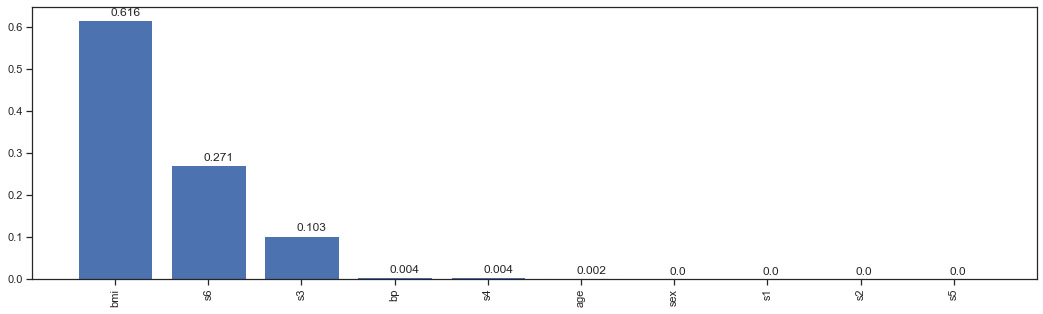

(['bmi', 's6', 's3', 'bp', 's4', 'age', 'sex', 's1', 's2', 's5'],
 [0.6156008779444537,
  0.27144511500353596,
  0.10310974300456081,
  0.003970264146044439,
  0.00375064753766194,
  0.0021233523637430507,
  0.0,
  0.0,
  0.0,
  0.0])

In [12]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

draw_feature_importances(dtr, diab_df)

In [15]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

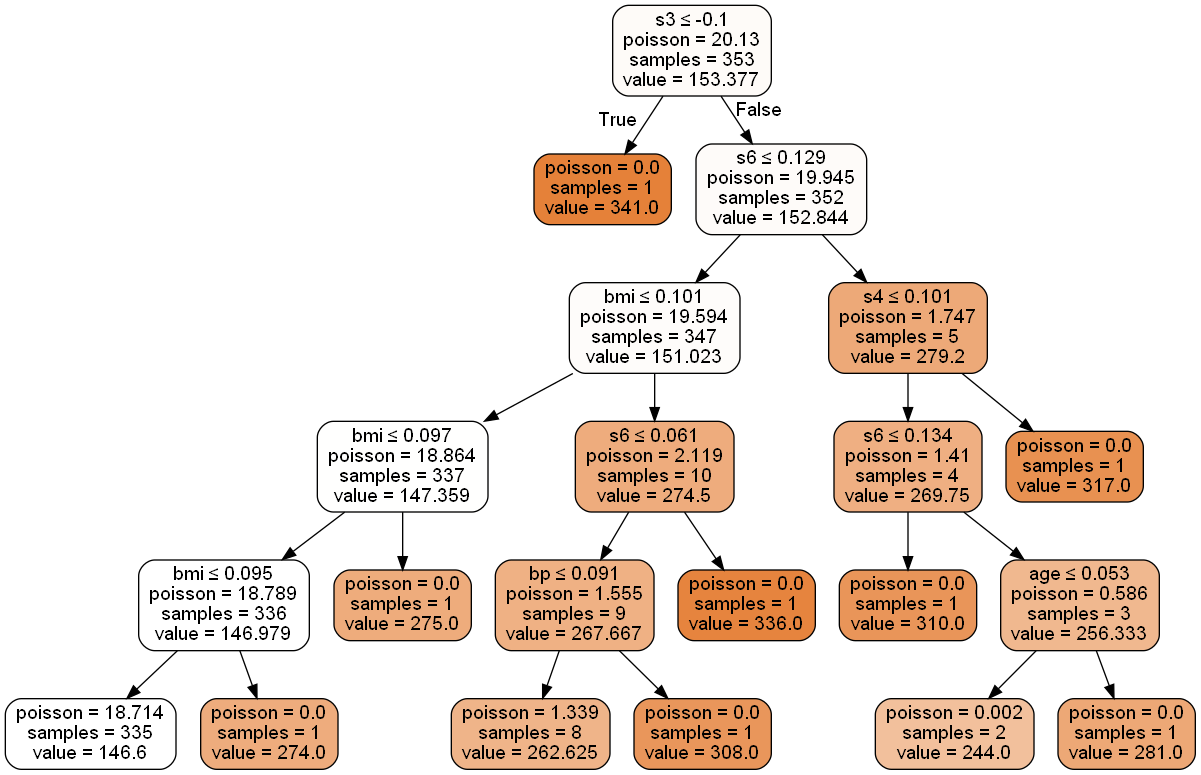

In [16]:
Image(get_png_tree(dtr, diab_df[diab['feature_names']].columns), height='70%')